This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. Here's how the Hass Avocado Board describes the data on their website:http://www.hassavocadoboard.com/retail/volume-and-price-data

* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold

PLU stands for the product lookup code

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
# read the avocado csv file
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [9]:
df.shape

(18249, 14)

In [10]:
# Drop column
df.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
df.info()

# No missing values observed

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [18]:
# we have data for 4 years
df.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

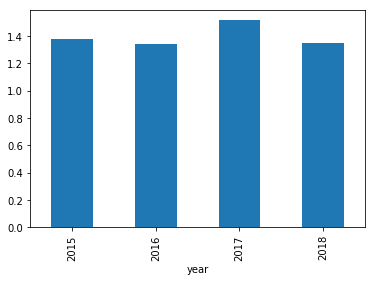

In [23]:
# Mean average price of avocados through the year
df.groupby('year')['AveragePrice'].mean().plot(kind='bar')

In [24]:
# Lets try the same plot with 'Date'
# before that change the data to the appropriate datetime format

df.Date = pd.to_datetime(df.Date)
# Month
df['Month'] = df['Date'].apply(lambda x: x.month)
df['Day'] = df['Date'].apply(lambda x: x.day)
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


Text(0.5,1,'Mean Average price of avocados by date')

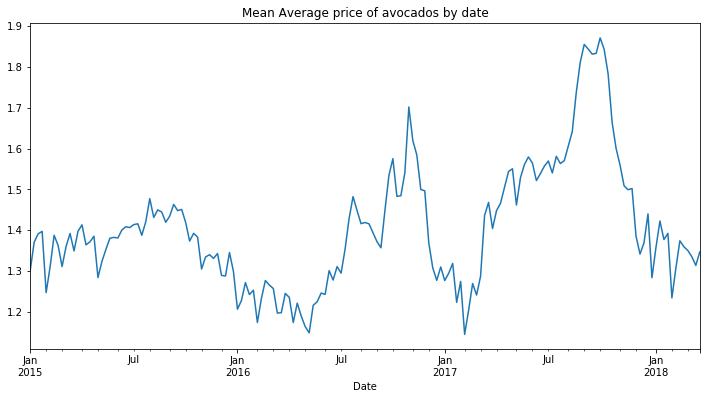

In [28]:
plt.figure(figsize=(12, 6))
df.groupby('Date')['AveragePrice'].mean().plot(kind='line');
plt.title('Mean Average price of avocados by date')

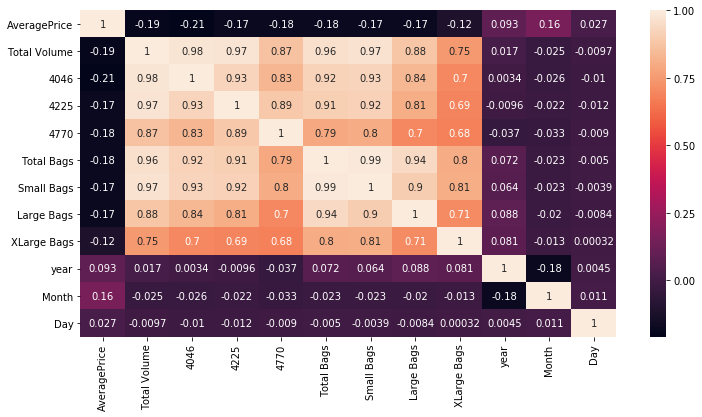

In [29]:
# Estimate correlation
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True);

No strong relation observed between the target price and features. Hence may need to some feature engineering


In [33]:
# Number of regions
df['region'].nunique()

54

In [35]:
# types of avocados
df.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [52]:
# Check for any catgeorical or object types datatypes as they need to be encoded before using a ML model
df.select_dtypes(include=['object']).dtypes

type      object
region    object
dtype: object

In [54]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [55]:
# These categorical needs to be label encoded or one hot encoded before we can use them inthe model. But here we will remove them
# we will encode the type and drop the region and Date (since we have Day month and year)

df.drop(['region', 'Date'], axis=1, inplace=True)
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,11,29


In [63]:
df1 = pd.get_dummies(df, drop_first=True)
df1.head()
# check to see if there are any categorical variables that need to be encoded
df1.select_dtypes(include=['object']).dtypes

Series([], dtype: object)

### Creating Machine learning models

In [64]:
# Linear Regression




Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day',
       'type_organic'],
      dtype='object')

In [71]:
col =[column for column in df1.columns!='AveragePrice']
col

[False, True, True, True, True, True, True, True, True, True, True, True, True]

In [81]:
cols =[col for col in df1.columns if col not in ['AveragePrice']]
X = df1[cols]
y = df1['AveragePrice']

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [93]:
# Create and train the model
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)

In [95]:
# Metric for linear regression
# MAE
# MSE
# RMSE

from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, prediction))
print('MSE', metrics.mean_squared_error(y_test, prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE 0.232770202642
MSE 0.0929575539393
RMSE 0.304889412639


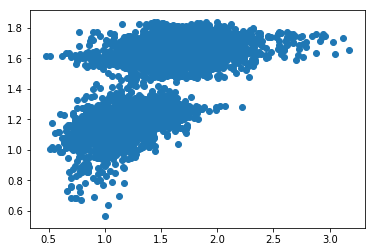

In [98]:
plt.scatter(y_test, prediction)
# Fairly dispersed and may not be a good prediction 

In [99]:
# using Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)

In [102]:
# Metric for Decision Tree regressor
# MAE
# MSE
# RMSE

#from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test, tree_pred))
print('MSE', metrics.mean_squared_error(y_test, tree_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, tree_pred)))

MAE 0.130063013699
MSE 0.0406464931507
RMSE 0.201609754602


In [113]:
# Using a Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=20, max_depth=9)
forest.fit(X_train, y_train)
forest_pred = forest.predict(X_test)
print('Prediction score', forest.score(X_test, y_test))

Prediction score 0.80579462873


In [114]:
print('MAE', metrics.mean_absolute_error(y_test, forest_pred))
print('MSE', metrics.mean_squared_error(y_test, forest_pred))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test, forest_pred)))

MAE 0.132914153202
MSE 0.0328875390279
RMSE 0.181349218437


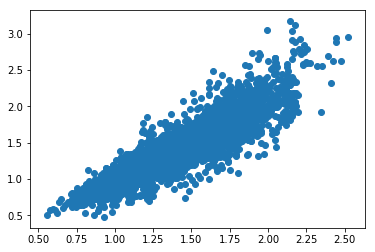

In [115]:
# Plot the prediction and the actual to see how closely they fit
plt.scatter(forest_pred,y_test)

Using the seaborn.distplot

Ref:[https://seaborn.pydata.org/generated/seaborn.distplot.html]
* This function combines the matplotlib hist function (with automatic calculation of a good default bin size) with the seaborn kdeplot() and rugplot() functions. It can also fit scipy.stats distributions and plot the estimated PDF over the data.

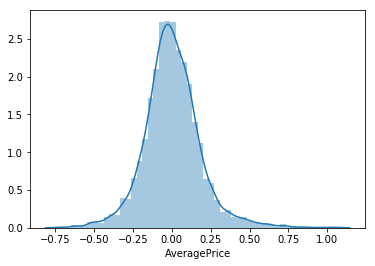

In [123]:
# Residuals : predition - actuals

sns.distplot(y_test-forest_pred, bins=50)
# combines the histogram with kde plots. Here we can see a noraml distribution

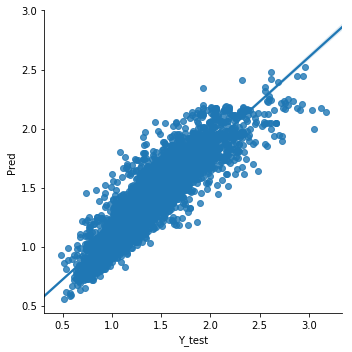

In [137]:
# seaborn lmplot
# To use the lmplot we need to create a dataframe first
# This function combines regplot() and FacetGrid. It is intended as a convenient interface to fit regression models across conditional subsets of a dataset.

data = pd.DataFrame({'Y_test': y_test, 'Pred': forest_pred})
data

sns.lmplot(data=data, x ='Y_test', y ='Pred')